# First-principles phase diagram

In [1]:
from pycalphad import Database, variables as v
from espei.datasets import load_datasets, recursive_glob
from espei.plot import multiplot
import matplotlib.pyplot as plt
import os
import subprocess

# write config file

In [2]:
input_file = """\
system:
  phase_models: Cu-Mg-input.json
  datasets: input-data
generate_parameters:
  excess_model: linear
  ref_state: SGTE91
output:
  output_db: cu-mg_dft.tdb
"""
with open(os.path.join('ESPEI-datasets', 'CU-MG', 'espei-in.yaml'), 'w') as f:
    f.writelines(input_file)

# run espei

In [3]:
subprocess.check_output(['espei', '--input', 'espei-in.yaml'], cwd=os.path.join('ESPEI-datasets', 'CU-MG'), universal_newlines=True)

"Single phase datasets are present, but there are no specified `excluded_model_contributions` keys present. 'idmix' exclusion will be added automatically for backwards compatibility, but this will go away in ESPEI v0.8. If you want ideal mixing contributions to be excluded, see the documentation for building datasets: http://espei.org/en/latest/input_data.html\n"

# load the experimental and DFT datasets

In [4]:
datasets = load_datasets(recursive_glob(os.path.join('ESPEI-datasets', 'CU-MG', 'input-data'), '*.json'))

# set up the pycalphad phase diagram calculation

In [5]:
dbf = Database(os.path.join('ESPEI-datasets', 'CU-MG', 'cu-mg_dft.tdb'))
comps = ['CU', 'MG', 'VA']
phases = ['LIQUID', 'FCC_A1', 'HCP_A3', 'CUMG2', 'LAVES_C15']
conds = {v.P: 101325, v.T: (300, 1500, 10), v.X('MG'): (0, 1, 0.01)}

# plot the phase diagram and data

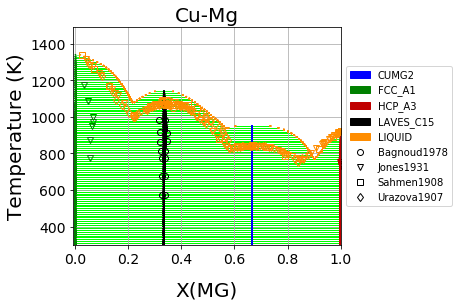

In [6]:
multiplot(dbf, comps, phases, conds, datasets)
plt.savefig('cu-mg_dft_phase_diagram.png')